<a href="https://colab.research.google.com/github/amrrmadhn/genaibc-lumoshive-final/blob/master/GenAI%20Model%20Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Import Dataset

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,Male,typical angina,125,212,No,normal,168,No,1.0,upsloping,Number of major vessels: 2,reversable defect,No disease
1,1,53,Male,typical angina,140,203,Yes,probable or definite left ventricular hypertrophy,155,Yes,3.1,downsloping,Number of major vessels: 0,reversable defect,No disease
2,2,70,Male,typical angina,145,174,No,normal,125,Yes,2.6,downsloping,Number of major vessels: 0,reversable defect,No disease
3,3,61,Male,typical angina,148,203,No,normal,161,No,0.0,upsloping,Number of major vessels: 1,reversable defect,No disease
4,4,62,Female,typical angina,138,294,Yes,normal,106,No,1.9,flat,Number of major vessels: 3,fixed defect,No disease


In [ ]:
# Memuat dataset yang sudah rapi ditahapan sebelumnya
data = "data.csv"
df = pd.read_csv(data, index_col=0)
df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

# Variabel terpilih
df = df[['sex','age','cp','thalach','slope','exang','ca','thal','oldpeak','target']]

In [ ]:
df.head()

,sex,age,cp,thalach,slope,exang,ca,thal,oldpeak,target
0,1,52,0,168,2,0,2,3,1.0,0
1,1,53,0,155,0,1,0,3,3.1,0
2,1,70,0,125,0,1,0,3,2.6,0
3,1,61,0,161,2,0,1,3,0.0,0
4,0,62,0,106,1,0,3,2,1.9,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 878
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      283 non-null    int64  
 1   age      283 non-null    int64  
 2   cp       283 non-null    int64  
 3   thalach  283 non-null    int64  
 4   slope    283 non-null    int64  
 5   exang    283 non-null    int64  
 6   ca       283 non-null    int64  
 7   thal     283 non-null    int64  
 8   oldpeak  283 non-null    float64
 9   target   283 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 24.3 KB


In [ ]:
df.describe()

,sex,age,cp,thalach,slope,exang,ca,thal,oldpeak,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.699647,54.049470,0.985866,149.961131,1.427562,0.318021,0.639576,2.310954,0.951943,0.558304
std,0.459224,9.128186,1.031324,22.691625,0.599246,0.466533,0.905532,0.579300,1.026400,0.497469
min,0.000000,29.000000,0.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,47.000000,0.000000,133.500000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,55.000000,1.000000,153.000000,1.000000,0.000000,0.000000,2.000000,0.600000,1.000000
75%,1.000000,60.000000,2.000000,168.000000,2.000000,1.000000,1.000000,3.000000,1.600000,1.000000
max,1.000000,77.000000,3.000000,202.000000,2.000000,1.000000,3.000000,3.000000,4.000000,1.000000


# Data Prep.

## Separating Dataset & Target

In [ ]:
# Separating Dataset & Target

# Define x and y
x = df.drop("target", axis=1)
y = df['target']

### x columns

In [ ]:
x.head()

,sex,age,cp,thalach,slope,exang,ca,thal,oldpeak
0,1,52,0,168,2,0,2,3,1.0
1,1,53,0,155,0,1,0,3,3.1
2,1,70,0,125,0,1,0,3,2.6
3,1,61,0,161,2,0,1,3,0.0
4,0,62,0,106,1,0,3,2,1.9


In [ ]:
x.shape

(283, 9)

### y columns

In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.shape

(283,)

# Data Scaling

In [ ]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[ 0.65520449, -0.22491878, -0.95761576, ...,  1.50500896,
         1.1915523 ,  0.0469034 ],
       [ 0.65520449, -0.11517393, -0.95761576, ..., -0.70754966,
         1.1915523 ,  2.0965128 ],
       [ 0.65520449,  1.7504886 , -0.95761576, ..., -0.70754966,
         1.1915523 ,  1.60851056],
       ...,
       [ 0.65520449, -0.22491878, -0.95761576, ...,  0.39872965,
         1.1915523 , -0.92910108],
       [ 0.65520449,  0.5432952 ,  1.95641929, ..., -0.70754966,
        -0.53772617, -0.92910108],
       [ 0.65520449, -0.00542907, -0.95761576, ...,  0.39872965,
         1.1915523 ,  0.43730519]])

[link text](https://)# Data Splitting

In [ ]:
# Mendefinisikan pemisahan data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 9)
(57, 9)
(226,)
(57,)


In [ ]:
x

,sex,age,cp,thalach,slope,exang,ca,thal,oldpeak
0,1,52,0,168,2,0,2,3,1.0
1,1,53,0,155,0,1,0,3,3.1
2,1,70,0,125,0,1,0,3,2.6
3,1,61,0,161,2,0,1,3,0.0
4,0,62,0,106,1,0,3,2,1.9
...,...,...,...,...,...,...,...,...,...
723,0,68,2,115,1,0,0,2,1.5
733,0,44,2,175,1,0,0,2,0.6
739,1,52,0,161,2,1,1,3,0.0
843,1,59,3,125,2,0,0,2,0.0


# Modelling Dataset

## Importing Modelling Libraries

## Logistic Regression

In [ ]:
# pengalian informasi Logistik Regresi dan hitung akurasinya
lr = LogisticRegression(random_state=42)

# train the classifier
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
y_pred_lr = lr.predict(x_test)

# printing the test accuracy
print("The training accuracy score of Logistric Regression Classifier is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test, y_pred_lr))

The training accuracy score of Logistric Regression Classifier is  0.8584070796460177
The test accuracy score of Logistric Regression Classifier is  0.8421052631578947


In [ ]:
# classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [ ]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

# train the classifier
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred_dt))

The test accuracy score of Decision Tree Classifier is  0.7368421052631579


In [ ]:
print (classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.79      0.71      0.75        31

    accuracy                           0.74        57
   macro avg       0.74      0.74      0.74        57
weighted avg       0.74      0.74      0.74        57



In [ ]:
x.head()

,sex,age,cp,thalach,slope,exang,ca,thal,oldpeak
0,1,52,0,168,2,0,2,3,1.0
1,1,53,0,155,0,1,0,3,3.1
2,1,70,0,125,0,1,0,3,2.6
3,1,61,0,161,2,0,1,3,0.0
4,0,62,0,106,1,0,3,2,1.9


## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

# train the classifier
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred_rf))

The test accuracy score of Random Forest Classifier is  0.8245614035087719


In [ ]:
print (classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.82      0.87      0.84        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57



## MLP

In [ ]:
mlp = MLPClassifier(random_state=42)

# train the classifier
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)

# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred_mlp))

The test accuracy score of MLP Classifier is  0.8070175438596491


In [ ]:
print (classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.79      0.87      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



# Hyperparameter Tuning

## Logistic Regression

In [ ]:
# Logistic regression classifier with hyperparameter
lr = LogisticRegression(random_state=42)

# Hyperparameter tuning
param_grid = {
    'max_iter': [100, 200, 300, 1000],
    'C': [0.1, 0.2, 0.3],
    'solver' : ["lbfgs", 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

gs1 = GridSearchCV(
        estimator= lr,
        param_grid = param_grid,
        cv=3,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_lr_lg = gs1.fit(x_train, y_train)

print("Best Hyperparameters:", fit_lr_lg.best_params_)
print("Best Score:", fit_lr_lg.best_score_)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best Score: 0.9268879268879268


In [ ]:
y_pred_lr_lg = fit_lr_lg.predict(x_test)
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test, y_pred_lr_lg))

The test accuracy score of Logistric Regression Classifier is  0.8421052631578947


In [ ]:
print (classification_report(y_test, y_pred_lr_lg))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



## Random Forest

In [ ]:
# RFC classifier with hyperparameter
rfc = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    "n_estimators": [100, 200, 300,],
    "max_depth": [None, 10, 20, 30],
    "criterion": ["gini", "entropy", 'log_loss']
}

gs1 = GridSearchCV(
        estimator= rfc,
        param_grid = param_grid,
        cv=3,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_rfc = gs1.fit(x_train, y_train)

print("Best Hyperparameters:", fit_rfc.best_params_)
print("Best Score:", fit_rfc.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}
Best Score: 0.9130983142611049


In [ ]:
y_pred_rfc = fit_rfc.predict(x_test)
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred_rfc))

The test accuracy score of Random Forest Classifier is  0.8070175438596491


In [ ]:
print (classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.79      0.87      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



## Decision Tree Classifier

In [ ]:
# Decision Tree Classifier with hyperparameter
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    "min_samples_split": [1, 2, 5, 10, 20],
    "max_depth": [None, 10, 20, 30],
    "criterion": ["gini", "entropy"]
}

gs1 = GridSearchCV(
        estimator= dt,
        param_grid = param_grid,
        cv=3,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_dt = gs1.fit(x_train, y_train)

print("Best Hyperparameters:", fit_dt.best_params_)
print("Best Score:", fit_dt.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 20}
Best Score: 0.8517120261306307


In [ ]:
y_pred_dt = fit_dt.predict(x_test)
print (classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.74      0.84      0.79        31

    accuracy                           0.75        57
   macro avg       0.76      0.75      0.75        57
weighted avg       0.76      0.75      0.75        57



## MLP Classifier

In [ ]:
# MLP Classifier with hyperparameter
mlp = MLPClassifier(random_state=42)

param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,100), (100,)],
               'activation': ['relu', 'tanh'],
               'solver': ["sgd", 'adam']
               }

gs1 = GridSearchCV(
        estimator = mlp,
        param_grid = param_grid,
        cv=3,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_mlp = gs1.fit(x_train, y_train)

print("Best Hyperparameters:", fit_mlp.best_params_)
print("Best Score:", fit_mlp.best_score_)

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
Best Score: 0.927810776647986


In [ ]:
y_pred_mlp = fit_mlp.predict(x_test)
print (classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



# ROC AUC

## ROC Analysis

In [ ]:
roc_y_pred_logreg = fit_lr_lg.predict_proba(x_test)[:, 1]
roc_y_pred_rfc = fit_rfc.predict_proba(x_test)[:, 1]
roc_y_pred_dt= fit_dt.predict_proba(x_test)[:, 1]
roc_y_pred_mlp= fit_mlp.predict_proba(x_test)[:, 1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, roc_y_pred_logreg)
auc_rf = roc_auc_score(y_test, roc_y_pred_rfc)
auc_dt = roc_auc_score(y_test, roc_y_pred_dt)
auc_mlp = roc_auc_score(y_test, roc_y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.8821339950372208
AUC-ROC for Random Forest: 0.8988833746898264
AUC-ROC for Decision Tree: 0.8331265508684864
AUC-ROC for MLP: 0.8957816377171216


## ROC Graph


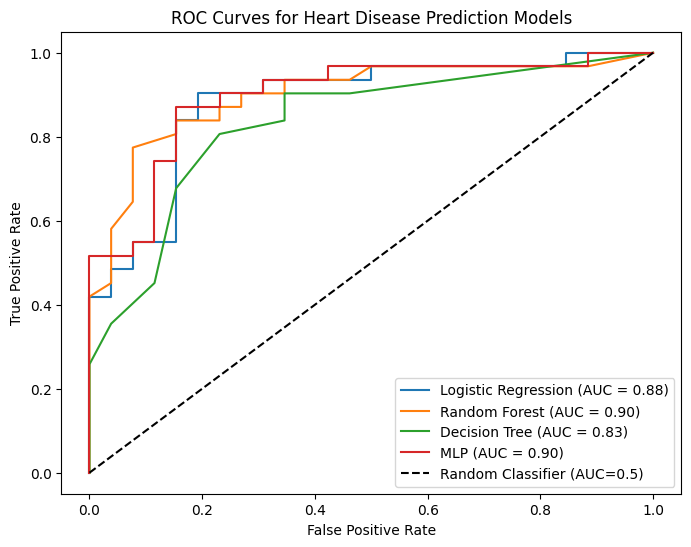

In [ ]:
#Membuat ROC Analisis
def plot_roc_curves(y_test, roc_y_pred_logreg, roc_y_pred_rfc, roc_y_pred_dt, roc_y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, roc_y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, roc_y_pred_rfc)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, roc_y_pred_dt)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, roc_y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC=0.5)')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, roc_y_pred_logreg, roc_y_pred_rfc, roc_y_pred_dt, roc_y_pred_mlp)

## ROC Threshold

In [ ]:
# ROC Analysis Graph untuk menentukan treshold
def find_rates_for_thresholds(y_test, y_pred, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, roc_y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, roc_y_pred_rfc, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_test, roc_y_pred_dt, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_test, roc_y_pred_mlp, thresholds)

'''TODO: Silahkan buat Summary DataFrame'''
summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'Logistic Regression FPR': fpr_logreg,
    'Logistic Regression TPR': tpr_logreg,
    'Random Forest FPR': fpr_rf,
    'Random Forest TPR': tpr_rf,
    'Decision Tree FPR': fpr_dt,
    'Decision Tree TPR': tpr_dt,
    'MLP FPR': fpr_mlp,
    'MLP TPR': tpr_mlp
})

print (summary_df)

    Threshold  Logistic Regression FPR  Logistic Regression TPR  \
0         0.0                 1.000000                 1.000000   
1         0.1                 0.653846                 0.967742   
2         0.2                 0.384615                 0.935484   
3         0.3                 0.307692                 0.935484   
4         0.4                 0.230769                 0.903226   
5         0.5                 0.192308                 0.870968   
6         0.6                 0.153846                 0.806452   
7         0.7                 0.115385                 0.548387   
8         0.8                 0.038462                 0.451613   
9         0.9                 0.000000                 0.161290   
10        1.0                 0.000000                 0.000000   

    Random Forest FPR  Random Forest TPR  Decision Tree FPR  \
0            0.884615           0.967742           0.461538   
1            0.615385           0.967742           0.461538   
2     

In [ ]:
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
# ROC Analysis Graph untuk menentukan best treshold
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    j_scores = tpr - fpr
    j_ordered = sorted(zip(j_scores, thresholds))
    return j_ordered[-1][1]
    optimal_idx = np.argmax(j_scores)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, roc_y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, roc_y_pred_rfc)
best_threshold_dt = find_best_threshold(y_test, roc_y_pred_dt)
best_threshold_mlp = find_best_threshold(y_test, roc_y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.44994141868257087
Best threshold for Random Forest: 0.67
Best threshold for Decision Tree: 0.6
Best threshold for MLP: 0.6017942576543094


# Export to Pickle File

In [ ]:
import pickle

pklfile = 'heart_disease_rfc.pkl'
with open(pklfile, 'wb') as file:
    pickle.dump(fit_rfc, file)

from google.colab import files
files.download(pklfile)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.describe()

,sex,age,cp,thalach,slope,exang,ca,thal,oldpeak,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.699647,54.049470,0.985866,149.961131,1.427562,0.318021,0.639576,2.310954,0.951943,0.558304
std,0.459224,9.128186,1.031324,22.691625,0.599246,0.466533,0.905532,0.579300,1.026400,0.497469
min,0.000000,29.000000,0.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,47.000000,0.000000,133.500000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,55.000000,1.000000,153.000000,1.000000,0.000000,0.000000,2.000000,0.600000,1.000000
75%,1.000000,60.000000,2.000000,168.000000,2.000000,1.000000,1.000000,3.000000,1.600000,1.000000
max,1.000000,77.000000,3.000000,202.000000,2.000000,1.000000,3.000000,3.000000,4.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 878
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      283 non-null    int64  
 1   age      283 non-null    int64  
 2   cp       283 non-null    int64  
 3   thalach  283 non-null    int64  
 4   slope    283 non-null    int64  
 5   exang    283 non-null    int64  
 6   ca       283 non-null    int64  
 7   thal     283 non-null    int64  
 8   oldpeak  283 non-null    float64
 9   target   283 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 24.3 KB


In [ ]:
df.nunique()

,0
sex,2
age,41
cp,4
thalach,88
slope,3
exang,2
ca,4
thal,3
oldpeak,36
target,2
